In [1]:
import healpy as hp, numpy as np, prjlib, curvedsky
from matplotlib.pyplot import *

In [2]:
def apodmask(W,t,ascale,nside,output=False):
    fname = prjlib.window_name(t,ascale=ascale)
    amask = curvedsky.utils.apodize(nside,W,ascale)
    if output: hp.fitsfunc.write_map(fname,amask,overwrite=True)
    print(np.mean(amask/(amask+1e-30)))
    print(np.mean(amask**1))
    print(np.mean(amask**2))
    print(np.mean(amask**3))
    print(np.mean(amask**4))
    hp.mollview(amask)

In [3]:
ascale = 5.
dwin = '/project/projectdirs/sobs/delensing/mask/'
fmaskla = dwin + 'simonsobs_noise_mask_x_mask_V3_bool.fits'
fmasksa = dwin + 'mask_apodized.fits'

LAT mask

In [4]:
Wla = hp.fitsfunc.read_map(fmaskla,verbose=False)
wla = hp.pixelfunc.ud_grade(Wla,2048)
#hp.mollview(Wla)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


In [5]:
#fmask0 = prjlib.window_name('la',ascale=0.)
#hp.fitsfunc.write_map(fmask0,wla,overwrite=True)

0.2910047173500061
0.25404106812564026
0.24660663194819224
0.24293087378051578
0.24061642729389157


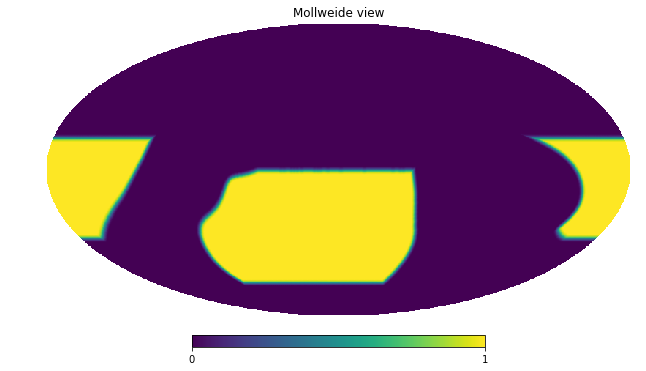

In [6]:
apodmask(wla,'la',ascale,2048)

SAT mask

1.0


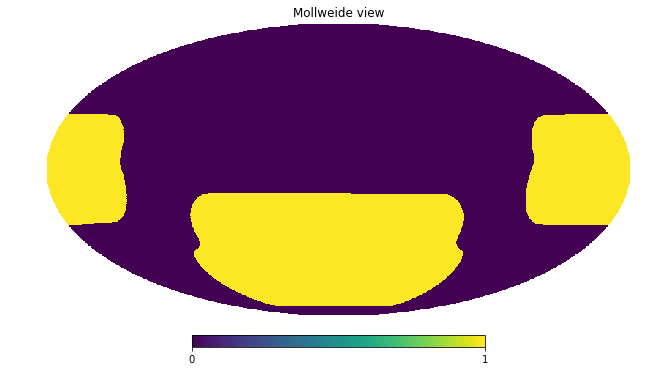

In [17]:
wsa = hp.ud_grade(hp.fitsfunc.read_map(fmasksa,verbose=False),512)
#r = hp.rotator.Rotator(coord=['G','C'])
#wsa = hp.rotator.Rotator.rotate_map_pixel(r,Wsa)
msa = wsa/(wsa+1e-30)
hp.mollview(msa)

In [41]:
# save SATxLAT binary mask
#print('fsky (pre):',np.average(wsa))
#wsa *= hp.pixelfunc.ud_grade(wla,512)
#print('fsky (post):',np.average(wsa))
fmask0 = prjlib.window_name('sa',ascale=0.)
hp.fitsfunc.write_map(fmask0,msa,overwrite=True)

In [ ]:
#apodmask(wsa,'sa',ascale,512,True)
fname = prjlib.window_name(t,ascale=ascale)
hp.fitsfunc.write_map(fname,wsa,overwrite=True)

Check Overlap Region

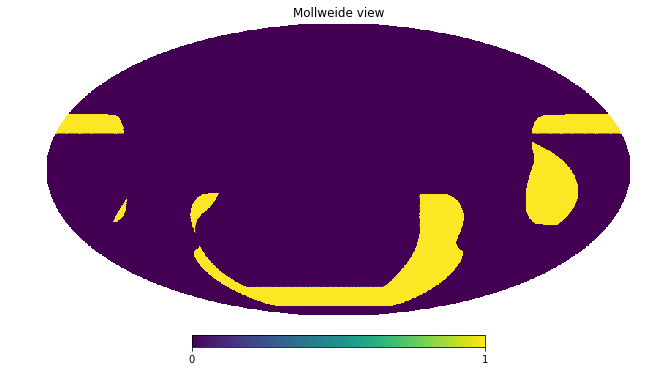

In [8]:
# SA only region
wla0 = hp.pixelfunc.ud_grade(wla,512)
hp.mollview((1.-wla0)*msa)

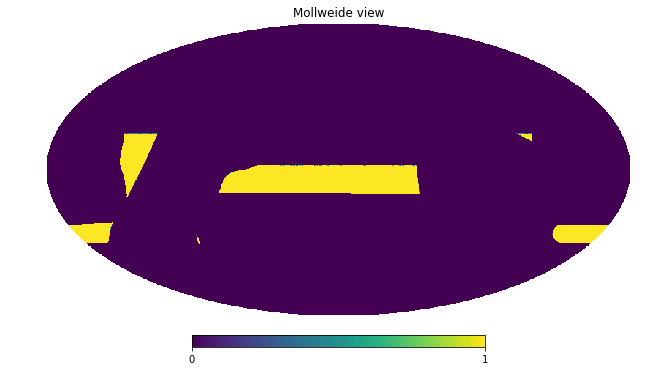

In [9]:
# LA only region
wla0 = hp.pixelfunc.ud_grade(wla,512)
hp.mollview(wla0*(1.-msa))